In [ ]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn

In [ ]:
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)


In [ ]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 samples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.sample(10)

,X1,X2,label
229,0.731322,0.370136,1
47,0.230737,0.782736,1
204,-0.404894,-0.696136,1
524,0.658440,-0.708097,0
23,0.739771,0.278370,1
528,0.002863,0.767390,1
799,-0.273331,-0.705073,1
408,0.765775,0.596702,0
234,0.904156,0.409043,0
814,-0.165981,-0.768489,1


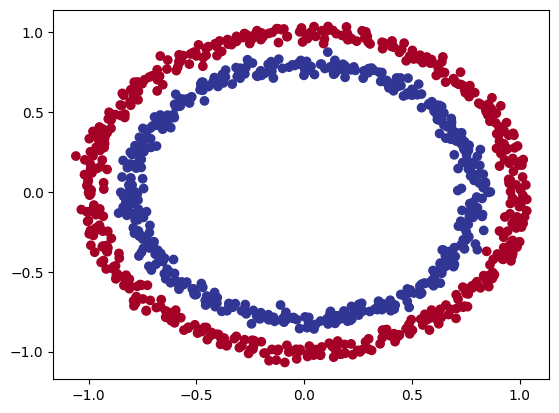

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
             y=X[:, 1],
             c=y,
             cmap=plt.cm.RdYlBu)

In [ ]:
#turning them into tensors
X_sample = X[0]
y_sample = y[0]

In [ ]:
X = torch.tensor(X, dtype=torch.float32)


In [ ]:
y = torch.tensor(y, dtype=torch.float32)

In [ ]:
Xtr, Xte, ytr, yte = train_test_split(X, y, random_state=42, test_size=0.2)

In [ ]:
"""# 2. BUilding a model

device = "cuda" if torch.cuda.is_available() else "cpu"

class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

        self.two_layers =  nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1))

    def forward(self, x):
        z = self.layer_1(x)
        z = self.layer_2(z)
        z = self.layer_3(z)
        return z
        #return self.two_layers(x)

model_1 = CircleModelv0().to(device)"""

'# 2. BUilding a model\n\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\n\nclass CircleModelv0(nn.Module):\n    def __init__(self):\n        super().__init__()\n        self.layer_1 = nn.Linear(in_features=2, out_features=10)\n        self.layer_2 = nn.Linear(in_features=10, out_features=10)\n        self.layer_3 = nn.Linear(in_features=10, out_features=1)\n\n        self.two_layers =  nn.Sequential(\n            nn.Linear(in_features=2, out_features=5),\n            nn.Linear(in_features=5, out_features=1))\n\n    def forward(self, x):\n        z = self.layer_1(x)\n        z = self.layer_2(z)\n        z = self.layer_3(z)\n        return z\n        #return self.two_layers(x)\n\nmodel_1 = CircleModelv0().to(device)'

In [ ]:
"""loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model_1.parameters(),lr=0.001)
"""

'loss_fn = nn.BCEWithLogitsLoss()\n\noptimizer = torch.optim.Adam(params=model_1.parameters(),lr=0.001)\n'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
Xtr, Xte = Xtr.to(device), Xte.to(device)
ytr, yte = ytr.to(device), yte.to(device)

In [ ]:
# ~Using nn.Sequantial()
"""model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_1"""

'model_1 = nn.Sequential(\n    nn.Linear(in_features=2, out_features=5),\n    nn.Linear(in_features=5, out_features=1)\n).to(device)\n\nmodel_1'

In [ ]:
#Clac accuracy - out of 100 examples. what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    y_true = y_true.view(-1)
    y_pred = y_pred.view(-1)
    if y_true.dtype != y_pred.dtype:
        y_pred = y_pred.to(y_true.dtype)
    return (y_true.eq(y_pred).float().mean().item() * 100.0)

In [ ]:
"""#3. creating a loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 1000


for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(Xtr)
    y_logits = y_logits.view(-1)
    y_pred = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits,
                   ytr)
    #loss = loss_fn(torch.sigmoid(y_logits)) if nn.BCELoss expects pred probs
    with torch.inference_mode():
        preds = (torch.sigmoid(y_logits) > 0.5).float()
        acc = accuracy_fn(ytr, preds)

    optimizer.zero_grad(); loss.backward(); optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(Xte.squeeze())
        test_logits = test_logits.view(-1)
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,
                            yte)
        test_acc = accuracy_fn(yte, test_pred)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")"""

'#3. creating a loop\ntorch.manual_seed(42)\ntorch.cuda.manual_seed(42)\nepochs = 1000\n\n\nfor epoch in range(epochs):\n    model_1.train()\n    y_logits = model_1(Xtr)\n    y_logits = y_logits.view(-1)\n    y_pred = torch.round(torch.sigmoid(y_logits))\n\n    loss = loss_fn(y_logits,\n                   ytr)\n    #loss = loss_fn(torch.sigmoid(y_logits)) if nn.BCELoss expects pred probs\n    with torch.inference_mode():\n        preds = (torch.sigmoid(y_logits) > 0.5).float()\n        acc = accuracy_fn(ytr, preds)\n\n    optimizer.zero_grad(); loss.backward(); optimizer.step()\n    model_1.eval()\n    with torch.inference_mode():\n        test_logits = model_1(Xte.squeeze())\n        test_logits = test_logits.view(-1)\n        test_pred = torch.round(torch.sigmoid(test_logits))\n\n        test_loss = loss_fn(test_logits,\n                            yte)\n        test_acc = accuracy_fn(yte, test_pred)\n    if epoch % 100 == 0:\n        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {

In [ ]:
"""model_1.eval()
with torch.inference_mode():
    y_logits = model_1(Xte.to(device))[:5]
y_logits"""

'model_1.eval()\nwith torch.inference_mode():\n    y_logits = model_1(Xte.to(device))[:5]\ny_logits'

In [ ]:
"""y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs"""

'y_pred_probs = torch.sigmoid(y_logits)\ny_pred_probs'

In [ ]:
"""#Find the predicted labels
y_preds = torch.round(y_pred_probs)

#In full
y_pred_labels = torch.round(torch.sigmoid(model_1(Xte.to(device))))

#Check for equality
#print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra dem
y_preds.squeeze()"""

'#Find the predicted labels\ny_preds = torch.round(y_pred_probs)\n\n#In full\ny_pred_labels = torch.round(torch.sigmoid(model_1(Xte.to(device))))\n\n#Check for equality\n#print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))\n\n#Get rid of extra dem\ny_preds.squeeze()'

In [ ]:
# Flatten y_pred_labels before passing to accuracy_fn
"""model_1.eval()
with torch.inference_mode():
    logits = model_1(Xte.to(device))              # shape (N, 1) or (N,)
    probs  = torch.sigmoid(logits)
    preds  = (probs > 0.5).to(yte.dtype).view(-1) # binary 0/1, flatten

acc = accuracy_fn(yte.to(device).view(-1), preds)
print(f"Accuracy: {acc:.2f}%")
"""


'model_1.eval()\nwith torch.inference_mode():\n    logits = model_1(Xte.to(device))              # shape (N, 1) or (N,)\n    probs  = torch.sigmoid(logits)\n    preds  = (probs > 0.5).to(yte.dtype).view(-1) # binary 0/1, flatten\n\nacc = accuracy_fn(yte.to(device).view(-1), preds)\nprint(f"Accuracy: {acc:.2f}%")\n'

In [ ]:
import requests
from pathlib import Path
#Dowload helper func from Learn PyTorch repo (if it is not already dowloaded)
if Path("helper_functions.py").is_file():
    print("exists")
else:
    print("dowloading")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

exists


In [ ]:
"""
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(model_1, Xtr, ytr)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, Xte, yte)"""

'\n# Plot decision boundary of the model\nplt.figure(figsize=(12,6))\nplt.subplot(1,2,1)\n\nplt.title("Train")\nplot_decision_boundary(model_1, Xtr, ytr)\n\nplt.subplot(1,2,2)\nplt.title("Test")\nplot_decision_boundary(model_1, Xte, yte)'

# 5. Improving a model (from a model perspective)
* Add more layers = give the model chances to learn about pattetns in the data
* Add mode hidden units (from 5 to 10, 20. ..n)
* Fit for longer (more epochs)
* Changing the activation func
* Change the LR (learning rate)
* Change the loss func

# could be from data perspective

In [ ]:
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.layer_1(x))))

model_3 = CircleModelV2().to(device)
model_3


CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimazer = torch.optim.Adam(params=model_3.parameters(), lr=0.001)

In [ ]:
torch.manual_seed(42)

epochs = 1001

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(Xtr).view(-1)
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, ytr)

    with torch.inference_mode():
        preds = (torch.sigmoid(y_logits) > 0.5).float()
        acc = accuracy_fn(ytr, preds)

    optimazer.zero_grad(); loss.backward(); optimazer.step()


    with torch.inference_mode():
        test_logits = model_3(Xte.squeeze())
        test_logits = test_logits.view(-1)
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,
                            yte)
        test_acc = accuracy_fn(yte, test_pred)
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69859, Acc: 50.00% | Test Loss: 0.69784, Test acc: 50.00%
Epoch: 100 | Loss: 0.67787, Acc: 55.37% | Test Loss: 0.67376, Test acc: 58.00%
Epoch: 200 | Loss: 0.66252, Acc: 59.62% | Test Loss: 0.66241, Test acc: 60.00%
Epoch: 300 | Loss: 0.63420, Acc: 64.63% | Test Loss: 0.64227, Test acc: 62.50%
Epoch: 400 | Loss: 0.58658, Acc: 83.13% | Test Loss: 0.60423, Test acc: 76.00%
Epoch: 500 | Loss: 0.52360, Acc: 92.00% | Test Loss: 0.55157, Test acc: 85.50%
Epoch: 600 | Loss: 0.45694, Acc: 95.00% | Test Loss: 0.48951, Test acc: 92.50%
Epoch: 700 | Loss: 0.39330, Acc: 96.50% | Test Loss: 0.42488, Test acc: 96.50%
Epoch: 800 | Loss: 0.33297, Acc: 98.25% | Test Loss: 0.36786, Test acc: 98.00%
Epoch: 900 | Loss: 0.28019, Acc: 98.75% | Test Loss: 0.31501, Test acc: 98.50%
Epoch: 1000 | Loss: 0.23919, Acc: 98.75% | Test Loss: 0.27152, Test acc: 98.00%


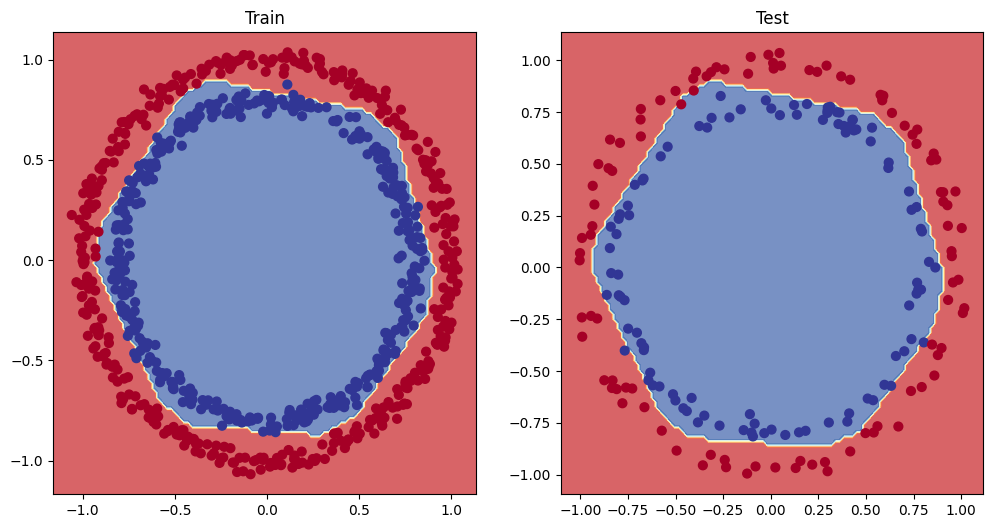

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(model_3, Xtr, ytr)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, Xte, yte)

In [ ]:
model_3.eval()
with torch.inference_mode():
    y_new_preds = torch.round(torch.sigmoid(model_3(Xte))).squeeze()
y_new_preds[:10], yte[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

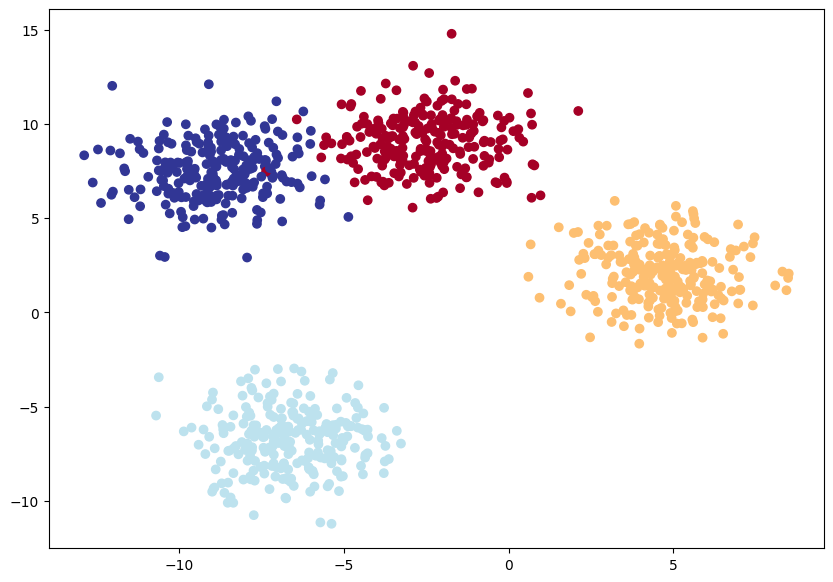

In [ ]:
from sklearn.datasets import make_blobs

#set hyperparams for data creation

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. Creating multi-class data

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)
#2. turn data into tensors

X_blob = torch.from_numpy(X_blob).type(torch.float32)
y_blob = torch.from_numpy(y_blob).type(torch.long) # Change dtype to torch.long

#3. Split and train, test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)
#4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
#5. Building a model (multi-class classification)
device = "cuda" if torch.cuda.is_available() else "cpu"

class BlobModel(nn.Module):
    def __init__(self, input_features, output_featurs, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_featurs)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)

blob = BlobModel(input_features=NUM_FEATURES,
                 output_featurs=NUM_CLASSES,
                 hidden_units=8).to(device)

In [ ]:
#loss and optim
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(params=blob.parameters(), lr=0.001)

In [ ]:
#Getting prediction probs for a multi-class model
blob.eval()
with torch.inference_mode():
    y_blob_logits = blob(X_blob_test)
y_blob_logits[:10], y_blob_test[:10]

(tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
         [-0.0973, -0.9431, -0.5963, -0.1371],
         [ 0.2528, -0.2379,  0.1882, -0.0066],
         [-0.4134, -0.5204, -0.9303, -0.6963],
         [-0.3118, -1.3736, -1.1991, -0.3834],
         [-0.1497, -1.0617, -0.7107, -0.1645],
         [ 0.1539, -0.2887,  0.1520, -0.0109],
         [-0.2154, -1.1795, -0.9300, -0.2745],
         [ 0.2443, -0.2472,  0.1649,  0.0061],
         [-0.2329, -1.2120, -0.9849, -0.3004]]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

In [ ]:
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

In [ ]:
#Covert out logits outputs to our logitts prob
#In order to eval and train/ test our model, we need to convert our model's outputs(logits) to pred probs and then to pred labels
# Logits -> pred probs -> pred labels
y_pred_probs = torch.softmax(y_blob_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [ ]:
### Create a training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001

for epoch in range(epochs):
    blob.train()
    logits = blob(X_blob_train)
    loss= loss_fn(logits, y_blob_train)

    with torch.inference_mode():
        y_pred = torch.softmax(logits, dim=1).argmax(dim=1)
        acc_train = accuracy_fn(y_blob_train, y_pred)

    optimizer.zero_grad(); loss.backward(); optimizer.step()

    blob.eval()
    with torch.inference_mode():
        test_logits = blob(X_blob_test)
        y_test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_blob_test)
        acc_test = accuracy_fn(y_blob_test, y_test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc_train:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {acc_test:.2f}%")



Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.14951, Test acc: 37.00%
Epoch: 100 | Loss: 0.63479, Acc: 98.00% | Test Loss: 0.66736, Test acc: 98.50%
Epoch: 200 | Loss: 0.20085, Acc: 99.00% | Test Loss: 0.20602, Test acc: 100.00%
Epoch: 300 | Loss: 0.07560, Acc: 99.12% | Test Loss: 0.07167, Test acc: 99.50%
Epoch: 400 | Loss: 0.04609, Acc: 99.25% | Test Loss: 0.03995, Test acc: 99.50%
Epoch: 500 | Loss: 0.03604, Acc: 99.12% | Test Loss: 0.02865, Test acc: 99.50%
Epoch: 600 | Loss: 0.03110, Acc: 99.12% | Test Loss: 0.02286, Test acc: 99.50%
Epoch: 700 | Loss: 0.02821, Acc: 99.25% | Test Loss: 0.01934, Test acc: 99.50%
Epoch: 800 | Loss: 0.02632, Acc: 99.25% | Test Loss: 0.01698, Test acc: 99.50%
Epoch: 900 | Loss: 0.02496, Acc: 99.25% | Test Loss: 0.01532, Test acc: 99.50%
Epoch: 1000 | Loss: 0.02390, Acc: 99.37% | Test Loss: 0.01406, Test acc: 99.50%


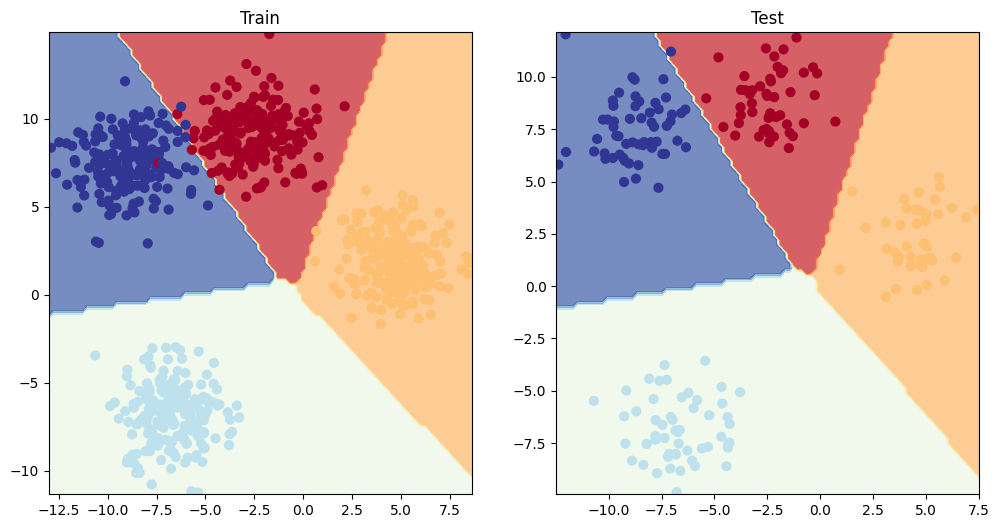

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(blob, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(blob, X_blob_test, y_blob_test)

In [ ]:
class BlobModelV2(nn.Module):
    def __init__(self, input_features, output_featurs, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_featurs),
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

In [ ]:
blob2 = BlobModelV2(input_features=NUM_FEATURES,
                 output_featurs=NUM_CLASSES,
                 hidden_units=32).to(device)


In [ ]:
#loss and optim
loss_fn = nn.CrossEntropyLoss()

optimizer2 = torch.optim.Adam(params=blob2.parameters(), lr=0.001)

In [ ]:
### Create a training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001

for epoch in range(epochs):
    blob2.train()
    logits2 = blob2(X_blob_train)
    loss2 = loss_fn(logits2, y_blob_train)

    with torch.inference_mode():
        y_pred2 = torch.softmax(logits2, dim=1).argmax(dim=1)
        acc_train2 = accuracy_fn(y_blob_train, y_pred2)

    optimizer2.zero_grad(); loss2.backward(); optimizer2.step()

    blob2.eval()
    with torch.inference_mode():
        test_logits2 = blob2(X_blob_test)
        y_test_pred2 = torch.softmax(test_logits2, dim=1).argmax(dim=1)

        test_loss2 = loss_fn(test_logits2, y_blob_test)
        acc_test2 = accuracy_fn(y_blob_test, y_test_pred2)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss2:.5f}, Acc: {acc_train2:.2f}% | Test Loss: {test_loss2:.5f}, Test acc: {acc_test2:.2f}%")


Epoch: 0 | Loss: 1.37735, Acc: 24.75% | Test Loss: 1.34398, Test acc: 20.00%
Epoch: 100 | Loss: 0.03818, Acc: 99.12% | Test Loss: 0.03067, Test acc: 99.50%
Epoch: 200 | Loss: 0.02386, Acc: 99.37% | Test Loss: 0.01353, Test acc: 99.50%
Epoch: 300 | Loss: 0.02097, Acc: 99.37% | Test Loss: 0.01020, Test acc: 99.50%
Epoch: 400 | Loss: 0.01941, Acc: 99.50% | Test Loss: 0.00836, Test acc: 99.50%
Epoch: 500 | Loss: 0.01811, Acc: 99.50% | Test Loss: 0.00695, Test acc: 100.00%
Epoch: 600 | Loss: 0.01696, Acc: 99.50% | Test Loss: 0.00574, Test acc: 100.00%
Epoch: 700 | Loss: 0.01596, Acc: 99.37% | Test Loss: 0.00468, Test acc: 100.00%
Epoch: 800 | Loss: 0.01519, Acc: 99.37% | Test Loss: 0.00387, Test acc: 100.00%
Epoch: 900 | Loss: 0.01465, Acc: 99.37% | Test Loss: 0.00327, Test acc: 100.00%
Epoch: 1000 | Loss: 0.01432, Acc: 99.37% | Test Loss: 0.00293, Test acc: 100.00%


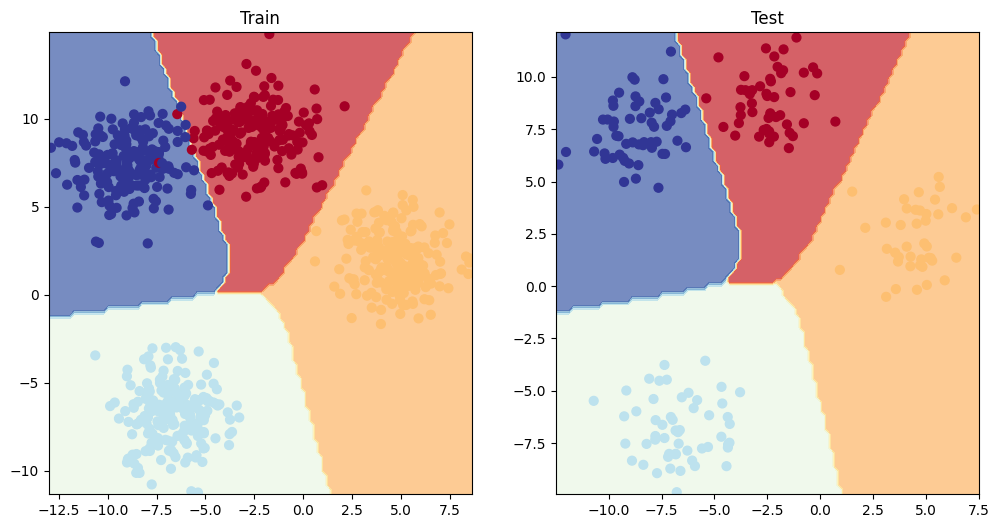

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)

plt.title("Train")
plot_decision_boundary(blob2, X_blob_train, y_blob_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(blob2, X_blob_test, y_blob_test)

In [ ]:
blob.eval()
with torch.inference_mode():
    some_logits = blob(X_blob_test)
    some_preds = torch.argmax(some_logits, dim=1)
torch.eq(some_preds,y_blob_test)


tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

# A few more classification metrics (to eval models)
* Accuracy - out of 100 samples, how many does our model get right? # torchmetrics.Accuracy()
* Precision = tp / tp + fp = to check how many false positives torchmetrics.Precision()
* Recall = tp / tp +fn = heigher recall leads to less false negatives torchmetrics.Recall()
* F1-score =
* Confusion matrix
* Classification report

In [ ]:
#Saving
from pathlib import Path

MODEL_PATH = Path('Models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "02_multi-class-blob.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
print(f"Saving the model to: {MODEL_SAVE_PATH}")
torch.save(blob.state_dict(),
           f=MODEL_SAVE_PATH)

Saving the model to: Models/02_multi-class-blob.pth


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_true = y_blob_test.cpu().numpy()
y_pred = some_preds.cpu().numpy()

print("Accuracy :", accuracy_score(y_true, y_pred))
print("Precision:", precision_score(y_true, y_pred, average='macro'))
print("Recall   :", recall_score(y_true, y_pred, average='macro'))
print("F1 Score :", f1_score(y_true, y_pred, average='macro'))
print("\nConfusion matrix:\n", confusion_matrix(y_true, y_pred))
print("\nDetailed report:\n", classification_report(y_true, y_pred))

Accuracy : 0.995
Precision: 0.995
Recall   : 0.9956140350877193
F1 Score : 0.9952623580942166

Confusion matrix:
 [[49  0  0  0]
 [ 0 41  0  0]
 [ 0  0 53  0]
 [ 1  0  0 56]]

Detailed report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        49
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        53
           3       1.00      0.98      0.99        57

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



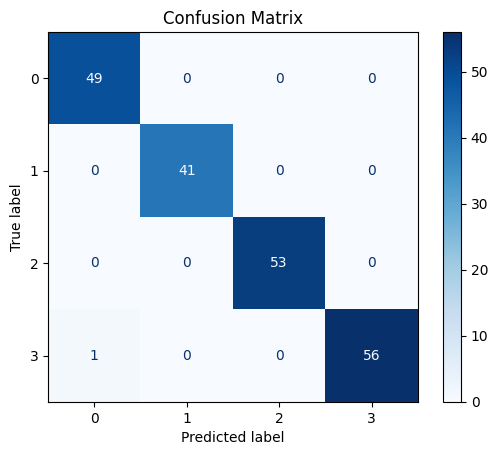

In [ ]:
cm = confusion_matrix(y_true, y_pred)     # rows=true, cols=predicted


# --- 4. Display with matplotlib ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 11.8 MB/s eta 0:00:00


In [ ]:
from torchmetrics import Accuracy

# Initialize Accuracy for multiclass classification
torchmetrics_acc = Accuracy(task='multiclass', num_classes=NUM_CLASSES)
torchmetrics_acc(some_preds, y_blob_test)

tensor(0.9950)